# Capstone Proposal

## The project's domain background 
    
    — the field of research where the project is derived

Robotics is the application of AI that most excites me. Autonomous vehicles is one of the most direct applications of AI in robotics, and this intersection between development of real products and cutting edge research is one of the reasons I am passionate about my job in this field.

Day to day I spend most of my time on perception, mostly at the microwave wavelength at which radar sees the world. While this world hits both of my twin passions of physics and robotics, it is unfortunately hard to share, as sensor data is largely proprietary, and cannot be shared with publically. 

Instead, I would like to tackle the other end of the autonomy problem, that of planning and control. To acheive this end, I plan to build upon the skills developed in the reinforcement learning section on the nanodegree for continous robotic control, specifically a DDPG agent (suited to continous control), while utilizing OpenAI's gym framework to solve a variety of control problems. 

Finally, to keep the focus on something related to autonomous vehicles, once we have proven that an agent can learn simplier control tasks in "classic control", it will be unleashed on the the car racing simulation in the Box2D section of OpenAI's gym. 

* https://gym.openai.com/envs/CarRacing-v0/

    
## A problem statement
    
    — a problem being investigated for which a solution will be defined

How well can agents generalize between different tasks? 

Specifically, how well does the DDPG agent generalize to a variety of other control tasks? What changes to reward function and agent are necessary, if any, to use the same agent to solve these tasks? Depending on the enviroment, what modifications to the agent are beneficial to solving a selection OpenAI's control environments. 

Can we train an agent on other control tasks, then transfer some of this learning to a car racing environments? If possible, this will show the usefulness of the "transfer learning" approach often used in re-inforcement leaning. At least, if not the weights and the input and output layers which are linked to the state and actions of the environment, can the general network architecture be shared?

If so, it allows us to train an agent in a simple, perhaps fast simulation, for many episodes, before training on a more complicated task.

At a minimum, the agent will be tested on the mountain car and cartpole simulations, before moving on to the car racing simulation.

Below are some references with OpenAI problems solved by actor-critic networks similar to the DDPG that will be attempted.

[1] Actor-Critic Models with Keras and OpenAI: https://towardsdatascience.com/reinforcement-learning-w-keras-openai-actor-critic-models-f084612cfd69
[2] CONTINUOUS CONTROL WITH DEEP REINFORCEMENT LEARNING TimothyP.Lillicrap, JonathanJ.Hunt, AlexanderPritzel, NicolasHeess, TomErez, YuvalTassa, DavidSilver&DaanWierstra
[3] SoftActor-Critic: Off-Policy Maximum Entropy Deep Reinforcement Learning with a Stochastic Actor. TuomasHaarnoja, Aurick Zhou, Pieter Abbeel, Sergey Levine

   
## The datasets and inputs

    — data or inputs being used for the problem
    
Since this is reinforcement learning, the data is the interaction with the enviroment itself. In this case the data and inputs will come from OpenAI's Gym enviroments.

* https://gym.openai.com/envs/CartPole-v1/
* https://gym.openai.com/envs/MountainCarContinuous-v0/
* https://gym.openai.com/envs/CarRacing-v0/

For the final task of car racing, the state space is as follows:  

* State consists of 96x96 pixels
* Reward is -0.1 every frame and +1000/N for every track tile visited, where N is the total number of tiles in track. For example, if you have finished in 732 frames, your reward is 1000 - 0.1*732 = 926.8 points.  
* Car also can go outside of PLAYFIELD, that is far off the track, then it will get -100 and die. 

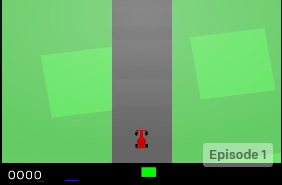

    
## A solution statement

    — a the solution proposed for the problem given

A solution will be defined based on the OpenAI car racing simulation.

* The episode finishes when all tiles representing a section of track are visited
* CarRacing-v0 defines "solving" as getting average reward of 900 over 100 consecutive trials.

The best agent will be able to traverse the track as quickly as possible, i.e. in the least number of frames, which will translate into the highest reward based on the default reward function provided by OpenAI.

   
## A benchmark model

    — some simple or historical model or result to compare the defined solution to;
    
Reinforcement learning is one of the least understood parts of artificial intellience. Due to the open nature of the problems tackled, with ill-defined "success" and "failure", when compared to the ground truth labels of supervised learning, it is often hard to benchmark reinforcement learning. 

### Benchmark I (initial goal)

A simple Q-learning agent, one not as well suited to the task on continuous control as DDPG, will serve as an initial benchmark agent.

### Benchmark II (stretch goal)

OpenAI has created a "gym", a framework with a set of "standard" environments and problem scopes, in which different agents can be rated against. 

I will use this to score the performance on my agent.

https://github.com/openai/gym/wiki/Leaderboard    

From here, the current leading is a submission from AMD using a Double Deep Q Network with Dropout "A Double Deep Q-Network (DDQN) [2] was trained using a modified version of the DeepMind Atari2600 architecture[1], a form of curriculum learning[3], and dropout for regularization[4]".

* https://github.com/AMD-RIPS/RL-2018
* https://drive.google.com/file/d/1DQU4yCsq6nbVJB6WKoXlED9YFGDselIu/view


    
## A set of evaluation metrics 

    — functional representations for how the solution can be measured;
    
The agents and reward functions will be evaluated based on three criteria
1. How well the agent does the task: the percentage of the goal acheived.
2. How quickly the agent learns the task: the number of many episodes to get to the goal.
3. How well does the agent learn: the average reward per episode, and a rolling average (say 100 episodes) reward per episode to better evaluate if the gradient of the learning is overall increasing.

    
## An outline of the project design 
 
    — how the solution will be developed and results obtained.

The project will be broken down into sections, each covering a different OpenAI environment.

For each environment, the DDPG agent will be used to solve the enviroment, with the results evaluated against the evaluation metrics, and compared with the results of the leaderboard on OpenAI.

The mountain car, and cartpole will serve as a starting point for test enviroments.

For the DDPG agent, the following initial architecture will be used.
* actor: 4 dense layers (64, 128, 128, 64) with dropout (this seems to help overfitting), relu for dense layers with sigmoid for activation layer to handle the continous action space
* actor: 4 dense layers (64, 128, 128, 32) with dropout (this seems to help overfitting), all relu
* Since the input space is pixels, CNN layers usage will also be evaluated (like the Atari game agents).
* optimizers (actor and critic): adam with learning rate of 0.0001, amsgrad = true (amsgrad: https://keras.io/optimizers/, https://openreview.net/forum?id=ryQu7f-RZ)
* OU Noise on the action space
* Memory Replay buffer to better learn from past episodes through random sampling
* simulated annealing of action space noise to help with the agent getting stuck
* L2 regularization on layers (was recommended in project review, but did not get a chance to try this on the quadcopter project and would like to experiment, https://keras.io/regularizers/)